In [23]:
from sklearn import svm,datasets
from pandas.io.parsers import read_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from scipy import stats
from nested_dict import nested_dict
from pyfasta import Fasta

In [24]:
def read_icshape_out(out=None, pureID=1):
	out_dict = nested_dict()
	with open(out, 'r') as OUT:
		for line in OUT:
			line = line.strip()
			if not line or line.startswith('#'): continue
			arr = line.split('\t')
			tx_id = arr[0]
			if pureID:
				tx_id = tx_id.split('.')[0]
			length = int(arr[1])
			rpkm = float(arr[2])
			reactivity_ls = arr[3:]
			out_dict[tx_id]['tx_id'] = tx_id
			out_dict[tx_id]['length'] = length
			out_dict[tx_id]['rpkm'] = rpkm
			out_dict[tx_id]['reactivity_ls'] = reactivity_ls
	return out_dict

In [25]:
out_dict_kethoxal_rRNA = read_icshape_out('in_vivo_mRNA_kethoxal.newrRNA.T2t100.out')

kethoxal = out_dict_kethoxal_rRNA['18S']['reactivity_ls']
kethoxal = [np.nan if i == 'NULL' else float(i) for i in kethoxal]
kethoxal_df = pd.DataFrame({'x':kethoxal})

In [44]:
#data import
icshape_125 = pd.read_csv('./ml/icshape.125-r1.18s.list',header=None,names=['x'])
score_125 = pd.read_csv('./ml/score.NAIN3-125-r1.T2t200.18s.list',header=None,names=['x'])
score_125_t500 = pd.read_csv('./ml/score.NAIN3-125-r1.T2t500.18s.list',header=None,names=['x'])
score_125_ext70 = pd.read_csv('./ml/score.NAIN3-125-r1.ex70.T2t200.18s.list',header=None,names=['x'])
score_125_ext150 = pd.read_csv('./ml/score.NAIN3-125-r1.ex150.T2t200.18s.list',header=None,names=['x'])
# icshape_paris = pd.read_csv('./ml/invivo.icSHAPE.18s.na.list',header=None,names=['x'])
icshape_paris = pd.read_csv('./ml/18S.invivo.icSHAPE.new.color',header=None,names=['x'])
#score_paris = pd.read_csv('../score.invivo.target.rRNA.t200.18S.na.list',header=None,names=['x'])
# icshape_sl_cy = pd.read_csv('./ml/icSHAPE.1.18s.na.list',header=None,names=['x'])
standard = pd.read_csv('./ml/human_18s_con.ct.color',header=None,names=['x'])
accessibility = read_table('./ml/18s_o2_sasa.sort.txt',header=None)
#standard = pd.read_csv('../../human_18s_con.ct',header=None,sep='\t')[2]
#flist = ['icshape_25','ml_125','ml_25','ml_125_t500','ml_125_t700','icshape_paris','icshape_sl']
X_test = [icshape_125,score_125,score_125_t500,score_125_ext70,score_125_ext150,icshape_paris, kethoxal_df]
y = standard
accessibility.columns = ['a','b','c']
#accessibility['a']
y.head(), y.shape

(     x
 0  1.0
 1  1.0
 2  1.0
 3  0.5
 4  0.5, (1869, 1))

In [27]:
fa_dict = Fasta('./ribosomalRNAindex/human.18s_rRNA.fa', key_fn=lambda key:key.split("\t")[0])
len(fa_dict['18S']), fa_dict['18S'][0:]

(1869,
 u'TACCTGGTTGATCCTGCCAGTAGCATATGCTTGTCTCAAAGATTAAGCCATGCATGTCTGAGTACGCACGGCCGGTACAGTGAAACTGCGAATGGCTCATTAAATCAGTTATGGTTCCTTTGGTCGCTCGCTCCTCTCCTACTTGGATAACTGTGGTAATTCTAGAGCTAATACATGCCGACGGGCGCTGACCCCCTTCGCGGGGGGGATGCGTGCATTTATCAGATCAAAACCAACCCGGTCAGCCCCTCTCCGGCCCCGGCCGGGGGGCGGGCGCCGGCGGCTTTGGTGACTCTAGATAACCTCGGGCCGATCGCACGCCCCCCGTGGCGGCGACGACCCATTCGAACGTCTGCCCTATCAACTTTCGATGGTAGTCGCCGTGCCTACCATGGTGACCACGGGTGACGGGGAATCAGGGTTCGATTCCGGAGAGGGAGCCTGAGAAACGGCTACCACATCCAAGGAAGGCAGCAGGCGCGCAAATTACCCACTCCCGACCCGGGGAGGTAGTGACGAAAAATAACAATACAGGACTCTTTCGAGGCCCTGTAATTGGAATGAGTCCACTTTAAATCCTTTAACGAGGATCCATTGGAGGGCAAGTCTGGTGCCAGCAGCCGCGGTAATTCCAGCTCCAATAGCGTATATTAAAGTTGCTGCAGTTAAAAAGCTCGTAGTTGGATCTTGGGAGCGGGCGGGCGGTCCGCCGCGAGGCGAGCCACCGCCCGTCCCCGCCCCTTGCCTCTCGGCGCCCCCTCGATGCTCTTAGCTGAGTGTCCCGCGGGGCCCGAAGCGTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCCCGAGCCGCCTGGATACCGCAGCTAGGAATAATGGAATAGGACCGCGGTTCTATTTTGTTGGTTTTCGGAACTGAGGCCATGATTAAGAGGGACGGCCGGGGGCATTCGTATTGCGCCGCTAGAGGTGAAATTCTTGGACCGGCGCAAGACGGACCA

In [28]:
fa_dict['18S'][0:].count('G')

550

In [41]:
DSSR_18S_combine = 'DSSR_18S_combine.txt'
DSSR_df = pd.read_csv(DSSR_18S_combine, sep="\t", header=None, names=['a', 'b', 'x', 'd', 'e'])
DSSR_df.index = DSSR_df['a']
nan_df = pd.DataFrame([np.nan]*1869, index=range(1, 1869 +1))
DSSR_df = pd.merge(nan_df, DSSR_df, left_index=True, right_index=True, how='left')[['a', 'b', 'x']]
print len(DSSR_df), DSSR_df.head()

standard_dssr = DSSR_df[['x']]
y=standard_dssr

print y.head(), y.shape, y.x.unique()

1869    a  b  x
1  1  U  1
2  2  A  1
3  3  C  1
4  4  C  0
5  5  U  0
   x
1  1
2  1
3  1
4  0
5  0 (1869, 1) [ 1.  0. nan]


In [31]:
pdb_sasa_file = './ml/human_allbase_o2.sr4.new.txt'
sa_df = pd.read_csv(pdb_sasa_file, sep="\t", header=None, names=['a', 'b', 'c'])
sa_df.index = sa_df['a']
nan_df = pd.DataFrame([np.nan]*len(standard), index=range(1, len(standard) +1))
sa_df = pd.merge(nan_df, sa_df, left_index=True, right_index=True, how='left')[['a', 'b', 'c']]
print len(sa_df),sa_df



1869          a    b         c
1        1    U  0.000000
2        2    A  0.000000
3        3    C  0.000000
4        4    C  0.000000
5        5    U  0.000000
6        6    G  0.000000
7        7    G  0.000000
8        8    U  0.000000
9        9    U  0.000000
10      10    G  0.000000
11      11    A  0.000000
12      12    U  0.000000
13      13    C  0.000000
14      14    C  0.000000
15      15    U  0.000000
16      16    G  0.000000
17      17    C  0.000000
18      18    C  0.000000
19      19    A  0.000000
20      20    G  0.000000
21      21    U  0.000000
22      22    A  0.000000
23      23    G  0.000000
24      24    C  0.000000
25      25    A  0.000000
26      26    U  0.000000
27      27  A2M  0.000000
28      28    U  0.000000
29      29    G  0.000000
30      30    C  0.000000
...    ...  ...       ...
1840  1840    U  0.000000
1841  1841    C  4.812782
1842  1842  4AC  0.000000
1843  1843    G  0.000000
1844  1844    U  0.000000
1845  1845    A  0.000000
1846  1

                x    y           a
count  149.000000  149  149.000000
mean     0.271067    1   30.529369
std      0.354996    0   24.674177
min      0.000000    1    3.014000
25%      0.029000    1    9.786000
50%      0.082000    1   19.193000
75%      0.418000    1   51.026000
max      1.000000    1   99.858000
                x    y           a
count  198.000000  198  198.000000
mean     0.070919    0   31.797076
std      0.156444    0   20.465089
min      0.000000    0    3.091000
25%      0.004000    0   13.772500
50%      0.024000    0   29.797000
75%      0.067500    0   46.707500
max      1.000000    0   86.852000


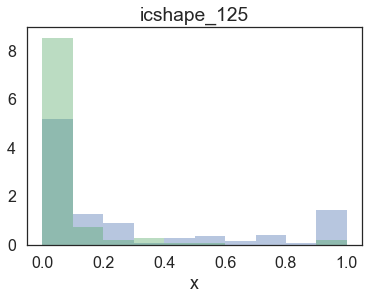

                x    y           a
count  151.000000  151  151.000000
mean     0.306557    1   30.242391
std      0.349140    0   24.634950
min      0.009865    1    3.014000
25%      0.053580    1    9.463000
50%      0.132683    1   18.986000
75%      0.492941    1   50.951500
max      1.000000    1   99.858000
                x    y           a
count  198.000000  198  198.000000
mean     0.121693    0   31.797076
std      0.176086    0   20.465089
min      0.009865    0    3.091000
25%      0.027992    0   13.772500
50%      0.061587    0   29.797000
75%      0.140830    0   46.707500
max      1.000000    0   86.852000


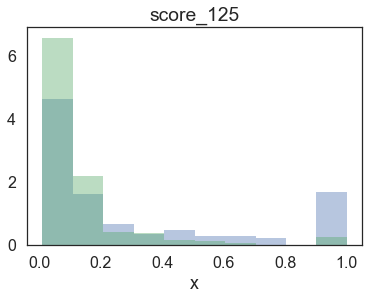

                x    y           a
count  150.000000  150  150.000000
mean     0.308553    1   30.380160
std      0.349444    0   24.659045
min      0.010317    1    3.014000
25%      0.054245    1    9.458250
50%      0.133029    1   19.089500
75%      0.495478    1   50.988750
max      1.000000    1   99.858000
                x    y           a
count  198.000000  198  198.000000
mean     0.121718    0   31.797076
std      0.176070    0   20.465089
min      0.010317    0    3.091000
25%      0.027992    0   13.772500
50%      0.061587    0   29.797000
75%      0.140830    0   46.707500
max      1.000000    0   86.852000


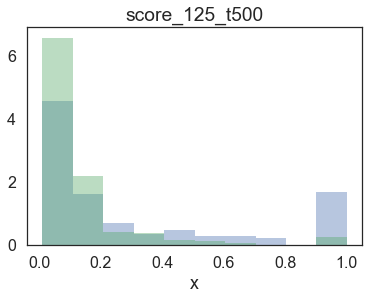

                x    y           a
count  150.000000  150  150.000000
mean     0.315036    1   30.380160
std      0.350734    0   24.659045
min      0.012305    1    3.014000
25%      0.061707    1    9.458250
50%      0.132988    1   19.089500
75%      0.507412    1   50.988750
max      1.000000    1   99.858000
                x    y           a
count  198.000000  198  198.000000
mean     0.121551    0   31.797076
std      0.178396    0   20.465089
min      0.012305    0    3.091000
25%      0.028522    0   13.772500
50%      0.066240    0   29.797000
75%      0.137518    0   46.707500
max      1.000000    0   86.852000


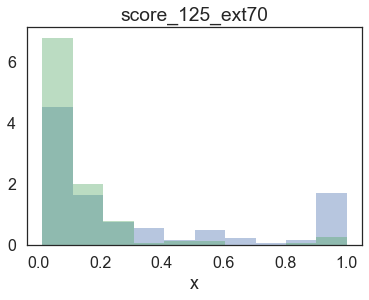

                x    y           a
count  150.000000  150  150.000000
mean     0.337680    1   30.380160
std      0.351920    0   24.659045
min      0.013805    1    3.014000
25%      0.074704    1    9.458250
50%      0.156392    1   19.089500
75%      0.551755    1   50.988750
max      1.000000    1   99.858000
                x    y           a
count  198.000000  198  198.000000
mean     0.121035    0   31.797076
std      0.180675    0   20.465089
min      0.013805    0    3.091000
25%      0.032229    0   13.772500
50%      0.066860    0   29.797000
75%      0.137003    0   46.707500
max      1.000000    0   86.852000


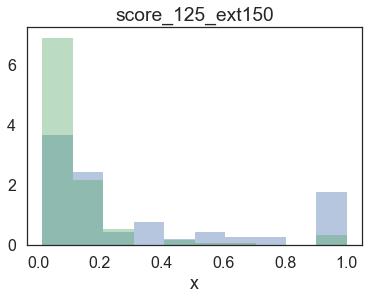

1869 1869
               x   y          a
count  42.000000  42  42.000000
mean    0.193571   1  32.262381
std     0.255587   0  24.608043
min     0.000000   1   3.014000
25%     0.042250   1   9.251250
50%     0.105000   1  30.094500
75%     0.248500   1  51.661250
max     1.000000   1  87.697000
               x   y          a
count  70.000000  70  70.000000
mean    0.042286   0  34.904714
std     0.082279   0  19.756157
min     0.000000   0   3.487000
25%     0.000000   0  20.354250
50%     0.017500   0  34.228000
75%     0.037750   0  47.716500
max     0.442000   0  86.462000


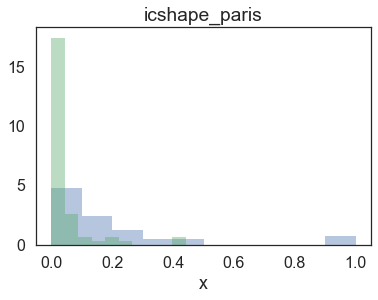

1869 1869
               x   y          a
count  42.000000  42  42.000000
mean    0.588238   1  32.262381
std     0.352367   0  24.608043
min     0.049000   1   3.014000
25%     0.234000   1   9.251250
50%     0.515000   1  30.094500
75%     1.000000   1  51.661250
max     1.000000   1  87.697000
               x   y          a
count  70.000000  70  70.000000
mean    0.277400   0  34.904714
std     0.256454   0  19.756157
min     0.000000   0   3.487000
25%     0.124000   0  20.354250
50%     0.205000   0  34.228000
75%     0.316250   0  47.716500
max     1.000000   0  86.462000


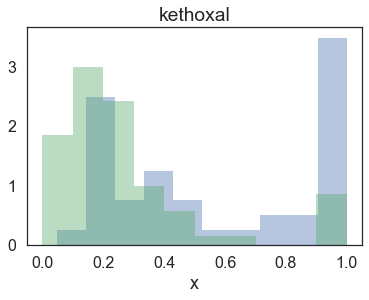

In [49]:
#fpr1,tpr1,_ = roc_curve(y, X1)
#roc_auc1 = auc(fpr1, tpr1)
filelist =['icshape_125','score_125','score_125_t500','score_125_ext70','score_125_ext150','icshape_paris', 'kethoxal']

fpr_list = []
tpr_list = []
roc_auc_list = []
#x_dic = {}
for i in range(len(X_test)):
    #print(i,X_test[i])
    #X_test[i]['y'] = pd.Series(y)
    X_test[i]['y'] = y
    X_test[i]['a'] = pd.Series(accessibility['c'])
#     X_test[i]['a'] = pd.Series(sa_df['c'])
    if filelist[i] in ['icshape_paris', 'kethoxal']:
        print len(X_test[i]['a']), len(list(fa_dict['18S'][0:]))
        X_test[i]['base'] = list(fa_dict['18S'][0:])
    X_select = X_test[i].dropna()
    X_select = X_select[X_select.a>=3]

#     def label(x):
#         if x['y'] == 0:
#             return 0
#         elif x['y'] == 1 and x['a'] >2.5:
#             return 1
#         else:
#             return np.nan
#     X_select['label'] = X_select.apply(label, axis=1)
    
    X_select = X_select.dropna()
    X_select = X_select[X_select['y']!=0.5]
    X_select = X_select[X_select['x']>=0 ]
    if filelist[i] in ['icshape_paris', 'kethoxal']:
        X_select = X_select[X_select['base'] == 'G' ]
    #print(X_select['y'])
    #fpr,tpr,_ = roc_curve(X_clean['y'],X_clean['x'])
    fpr,tpr,_ = roc_curve(X_select['y'],X_select['x'])
    ml_125_ss = X_select[X_select.y==1]
    ml_125_ds = X_select[X_select.y==0]
    print(ml_125_ss.describe())
    print(ml_125_ds.describe())
    sns.distplot(ml_125_ss.dropna()['x'],norm_hist=True,kde=False, bins=10)
    sns.distplot(ml_125_ds.dropna()['x'],norm_hist=True,kde=False, bins=10)
    plt.title(filelist[i])
    plt.show()
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(auc(fpr_list[i],tpr_list[i]))

0
1
2
3
4
5
6


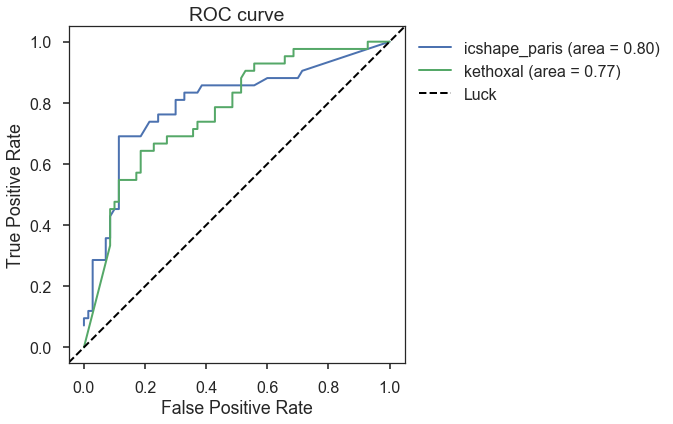

In [50]:
plt.figure()
lw = 2
#plt.plot(fpr1, tpr1, color='darkorange',
#         lw=lw, label='icshape_reactivity (area = %0.2f)' % roc_auc1)
#color = ['red','orange','green','purple','blue','black','yellow']
# filelist =['icshape_125','score_125','score_125_t500','score_125_ext70','score_125_ext150','icshape_paris','icshape_sl_cy']
with sns.axes_style("ticks"):
    fig,ax=plt.subplots(figsize=(6,6))
for i in range(len(X_test)):
    print (i)
    if i < 5:
        continue
    plt.plot(fpr_list[i],tpr_list[i],lw = lw,label = '%s (area = %0.2f)' %(filelist[i],roc_auc_list[i]))
plt.plot([-0.05, 1.05], [-0.05, 1.05], color='black', lw=lw, linestyle='--',label='Luck')
ax.axis('square')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
# plt.show()
plt.tight_layout()
plt.savefig('human_18S.pdf')

In [52]:
fpr_list[-1], tpr_list[-1]

(array([0.        , 0.08571429, 0.08571429, 0.1       , 0.1       ,
        0.11428571, 0.11428571, 0.17142857, 0.17142857, 0.18571429,
        0.18571429, 0.21428571, 0.22857143, 0.22857143, 0.27142857,
        0.27142857, 0.35714286, 0.35714286, 0.37142857, 0.37142857,
        0.42857143, 0.42857143, 0.48571429, 0.48571429, 0.51428571,
        0.51428571, 0.52857143, 0.55714286, 0.55714286, 0.58571429,
        0.61428571, 0.65714286, 0.65714286, 0.68571429, 0.68571429,
        0.71428571, 0.81428571, 0.84285714, 0.85714286, 0.88571429,
        0.92857143, 0.92857143, 1.        ]),
 array([0.        , 0.33333333, 0.45238095, 0.45238095, 0.47619048,
        0.47619048, 0.54761905, 0.54761905, 0.57142857, 0.57142857,
        0.64285714, 0.64285714, 0.64285714, 0.66666667, 0.66666667,
        0.69047619, 0.69047619, 0.71428571, 0.71428571, 0.73809524,
        0.73809524, 0.78571429, 0.78571429, 0.83333333, 0.83333333,
        0.88095238, 0.9047619 , 0.9047619 , 0.92857143, 0.92857143,
  

In [55]:
mouse_fpr_list = [0.        , 0.02409639, 0.06024096, 0.06024096, 0.07228916,
        0.07228916, 0.08433735, 0.08433735, 0.09638554, 0.09638554,
        0.10843373, 0.10843373, 0.12048193, 0.12048193, 0.13253012,
        0.13253012, 0.14457831, 0.14457831, 0.15662651, 0.15662651,
        0.20481928, 0.21686747, 0.25301205, 0.25301205, 0.26506024,
        0.26506024, 0.30120482, 0.3253012 , 0.37349398, 0.39759036,
        0.42168675, 0.42168675, 0.44578313, 1.        ]
mouse_tpr_list = [0.   , 0.275, 0.275, 0.3  , 0.3  , 0.425, 0.425, 0.475, 0.475,
        0.575, 0.575, 0.6  , 0.6  , 0.625, 0.625, 0.65 , 0.65 , 0.7  ,
        0.7  , 0.725, 0.725, 0.75 , 0.75 , 0.775, 0.775, 0.825, 0.825,
        0.825, 0.825, 0.825, 0.825, 0.85 , 0.85 , 1.   ]

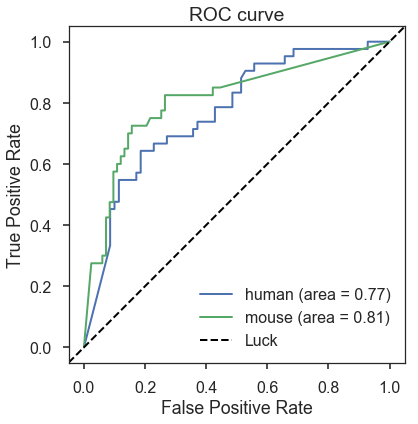

In [60]:
plt.figure()
lw = 2
with sns.axes_style("ticks"):
    fig,ax=plt.subplots(figsize=(6,6))
plt.plot(fpr_list[-1],tpr_list[-1],lw = lw,label = '%s (area = %0.2f)' %('human',roc_auc_list[-1]))
plt.plot(mouse_fpr_list,mouse_tpr_list,lw = lw,label = '%s (area = %0.2f)' %('mouse',0.81))
plt.plot([-0.05, 1.05], [-0.05, 1.05], color='black', lw=lw, linestyle='--',label='Luck')
ax.axis('square')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
# plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.legend(loc='best')
# plt.show()
plt.tight_layout()
plt.savefig('human_mouse_18S.pdf')

In [ ]:
ml_125_ss = ml_125[ml_125.y==1]
ml_125_ds = ml_125[ml_125.y==0]
sns.distplot(ml_125_ss.dropna()['x'],norm_hist=True,kde=False, bins=20,fit=stats.beta)
sns.distplot(ml_125_ds.dropna()['x'],norm_hist=True,kde=False, bins=20,fit=stats.beta)
plt.show()